# Testing pyNamo

## Settings

In [73]:
inspect.getsource(drawer.setSimplex)

'def setSimplex(strat, payMtx, ax, fontSize, zOrder):\n    """Draws the simplex frame."""\n    if payMtx[0].shape == (3,):\n        pt1 = eqsol.p_to_sim(1,0)\n        pt2 = eqsol.p_to_sim(0,1)\n        pt3 = eqsol.p_to_sim(0,0)\n        lbl1 = ax.annotate(strat[0], (pt1[0] - 0.01, pt1[1] - 0.04), fontsize=fontSize, zorder = zOrder)\n        lbl2 = ax.annotate(strat[1], (pt2[0] - 0.08, pt2[1] - 0.0), fontsize=fontSize, zorder = zOrder)\n        lbl3 = ax.annotate(strat[2], (pt3[0] + 0.12, pt3[1] - 0.01), fontsize=fontSize, zorder = zOrder)\n        xs = [[pt1[0], pt2[0]], [pt1[0], pt3[0]], [pt2[0], pt3[0]]]\n        ys = [[pt1[1], pt2[1]], [pt1[1], pt3[1]], [pt2[1], pt3[1]]]\n        bdr1 = plt.plot(xs[0], ys[0], color=\'black\', zorder=zOrder, alpha=1, clip_on=False)\n        bdr2 = plt.plot(xs[1], ys[1], color=\'black\', zorder=zOrder, alpha=1, clip_on=False)\n        bdr3 = plt.plot(xs[2], ys[2], color=\'black\', zorder=zOrder, alpha=1, clip_on=False)\n        return bdr1+bdr2+bdr3 +

In [72]:
import time
import random
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm

import drawer
import parameters as param

import equationsolver as eqsol
import inspect

In [12]:
#Setting LaTeX fonts for plotting in matplotlib

from matplotlib import rc, rcParams
rc('text',usetex=True)
rcParams['text.latex.preamble'] = [
       r'\usepackage{siunitx}',   # i need upright \micro symbols, but you need...
       r'\sisetup{detect-all}',   # ...this to force siunitx to actually use your fonts
       #r'\usepackage{fouriernc}',
       r'\usepackage{times}',
       r'\usepackage{marvosym}',
       #r'\usepackage[defaultsans]{lato}',    # set the normal font here
       r'\usepackage{sansmath}',  # load up the sansmath so that math -> helvet
       r'\renewcommand\familydefault{\sfdefault}',
       r'\sansmath'               # <- tricky! -- gotta actually tell tex to use!
       r'\Large'
]
#rc('font',**{'family':'serif','serif':['fouriernc']})
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})

#plt.rcParams['figure.figsize'] = [5, (4.8/6.4)*5]
plt.rcParams['figure.dpi'] = 150

%config InlineBackend.figure_format = 'retina'


<ipython-input-12-79fa2a394bcc>:5: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  rcParams['text.latex.preamble'] = [


## First test

In [50]:
eqsol.p_to_sim(0,1)

[0.0, 0.0]

 Text(0.49, 0.9060254037844386, '$R$'),
 Text(-0.05, -0.01, '$P$'),
 Text(1.02, -0.01, '$S$')]

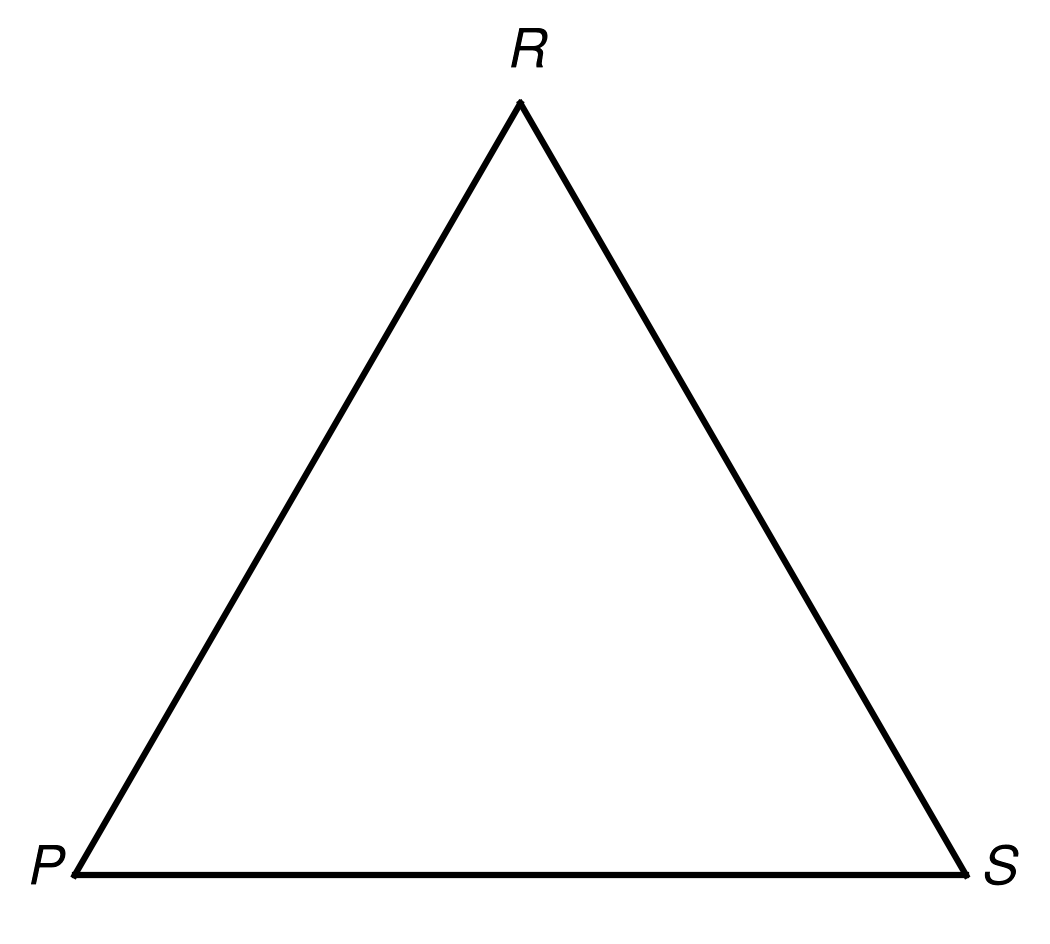

In [68]:
fig, ax = plt.subplots()

ax.set_aspect('equal')
plt.axis('off')

drawer.setSimplex(['$R$','$P$','$S$'], pMrps, ax, 13, 53)

In [60]:
strat[1]

'$P$'

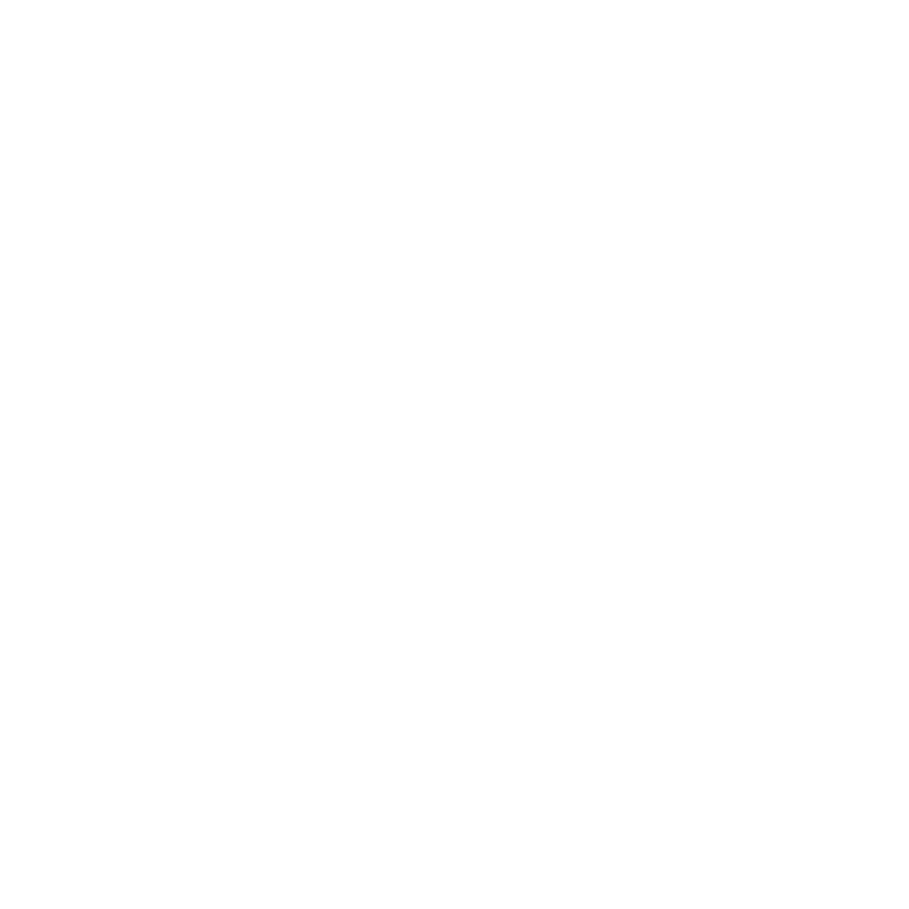

In [65]:
fig, ax = plt.subplots()

ax.set_aspect('equal')
plt.axis('off')
plt.plot(clip_on=False)


strat = ['$R$','$P$','$S$']
plt.show(lbl3)

 Text(0.49, 0.9060254037844386, '$R$'),
 Text(0.08, 0.01, '$P$'),
 Text(1.12, -0.01, '$S$')]

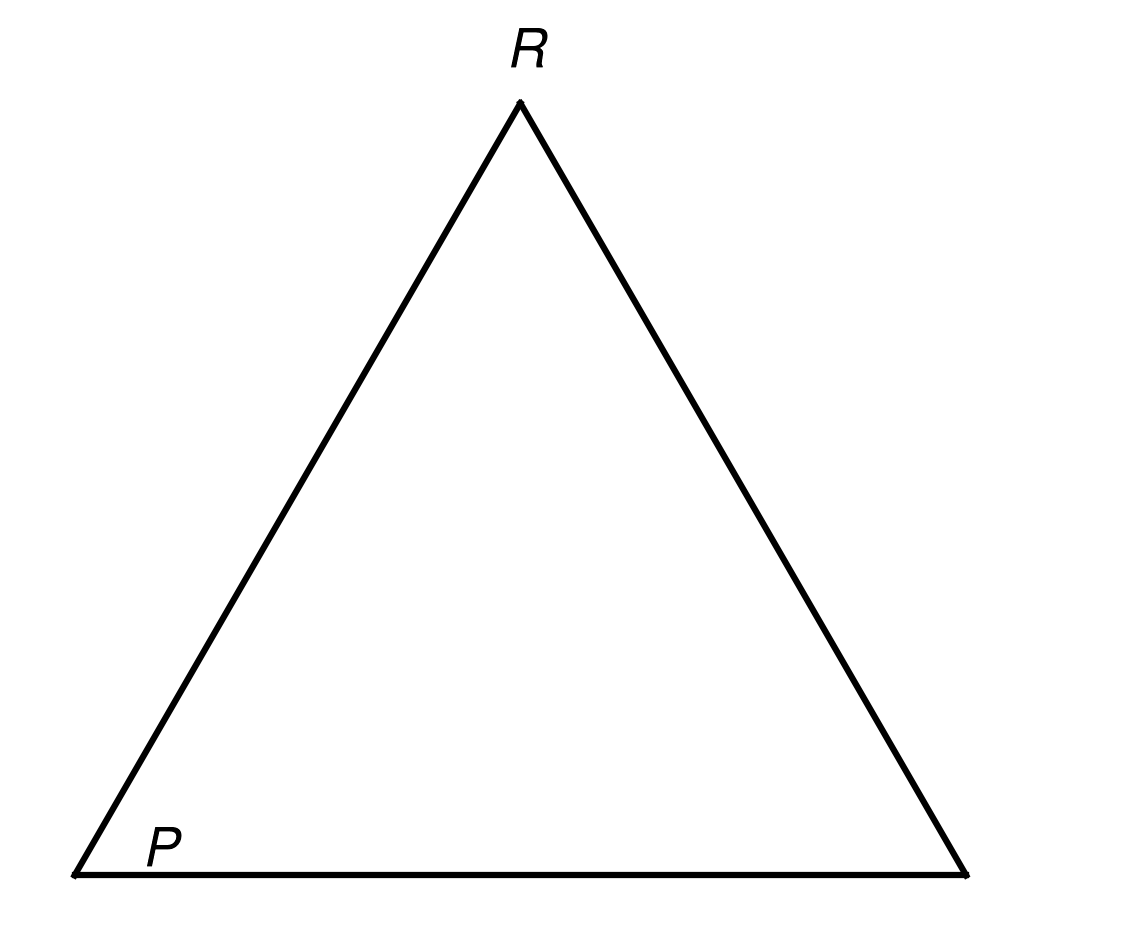

In [77]:
fig, ax = plt.subplots()

ax.set_aspect('equal')
plt.axis('off')

strat = ['$R$','$P$','$S$']

pt1 = eqsol.p_to_sim(1,0)
pt2 = eqsol.p_to_sim(0,1)
pt3 = eqsol.p_to_sim(0,0)
lbl1 = ax.annotate(strat[0], (pt1[0] - 0.01, pt1[1] + 0.04), fontsize=13, zorder = 53)
lbl2 = ax.annotate(strat[1], (pt2[0] + 0.08, pt2[1] + 0.01), fontsize=13, zorder = 53)
lbl3 = ax.annotate(strat[2], (pt3[0] + 0.12, pt3[1] - 0.01), fontsize=13, zorder = 53)
xs = [[pt1[0], pt2[0]], [pt1[0], pt3[0]], [pt2[0], pt3[0]]]
ys = [[pt1[1], pt2[1]], [pt1[1], pt3[1]], [pt2[1], pt3[1]]]
bdr1 = plt.plot(xs[0], ys[0], color='black', zorder=53, alpha=1, clip_on=False)
bdr2 = plt.plot(xs[1], ys[1], color='black', zorder=53, alpha=1, clip_on=False)
bdr3 = plt.plot(xs[2], ys[2], color='black', zorder=53, alpha=1, clip_on=False)
bdr1+bdr2+bdr3+[lbl1]+[lbl2]+[lbl3]


FP [0.0, 0.0, 1.0] | eigVs [2.0, -1.0]
FP [0.0, 1.0, 0.0] | eigVs [2.0, -1.0]
FP [0.33, 0.33, 0.33] | eigVs [(-0.17+0.87j), (-0.17-0.87j)]
FP [1.0, 0.0, 0.0] | eigVs [-1.0, 2.0]


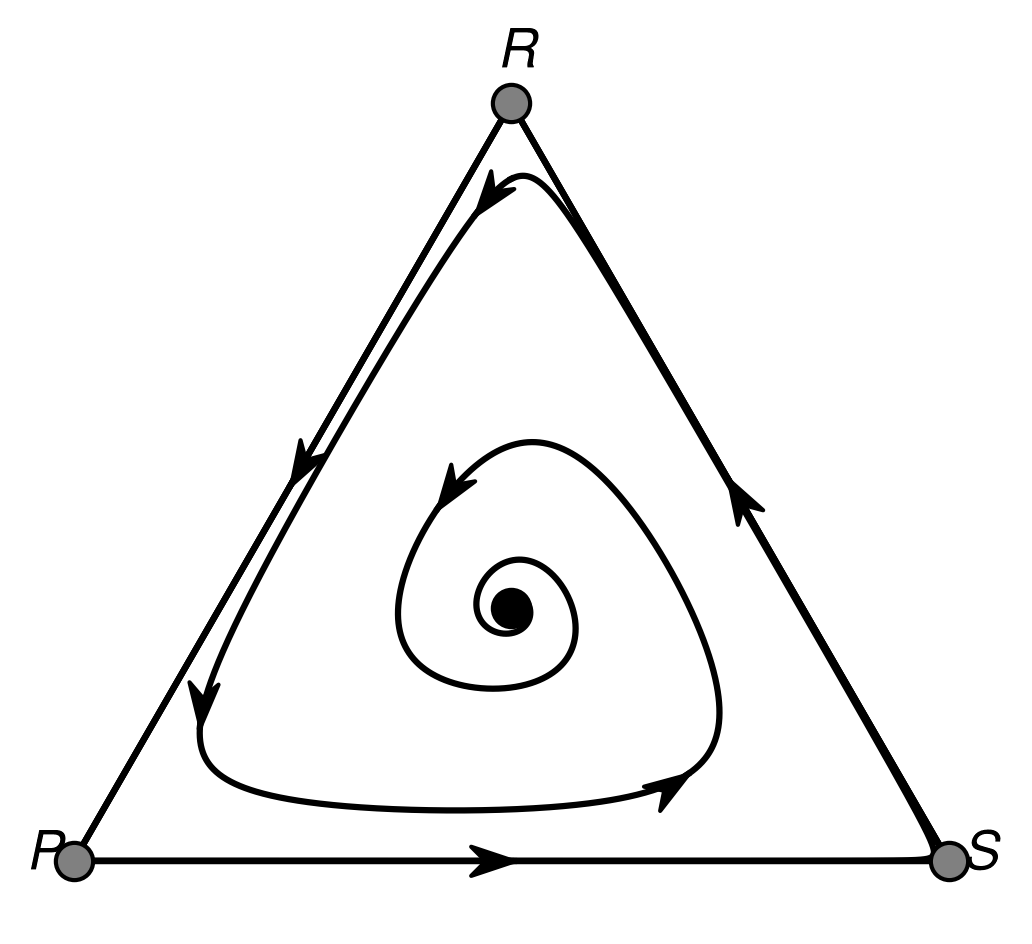

In [45]:
arrowSize= 1/20.0
arrowWidth= (1/3)*arrowSize
#step = 0.01

pMrps = np.array([[0,-1,2],[2,0,-1],[-1,2,0]]) #Good Rock-Paper-Scissors game

fig, ax = plt.subplots()

ax.set_aspect('equal')
plt.axis('off')

plt.plot(clip_on=False)

drawer.setSimplex(['$R$','$P$','$S$'], pMrps, ax, 13, 53)
drawer.trajectory([0.9, 0.05], pMrps, param.step, [0.01, 0.06, 0.12, 0.2], 50, fig, ax, 'black', arrowSize, arrowWidth, 53)
drawer.trajectory([0.5, 0], pMrps, param.step, [0.0001], 10, fig, ax, 'black', arrowSize, arrowWidth, 53)
drawer.trajectory([0,0.5], pMrps, param.step, [0.0001], 10, fig, ax, 'black', arrowSize, arrowWidth, 53)
drawer.trajectory([0.5, 0.5], pMrps, param.step, [0.0001], 10, fig, ax, 'black', arrowSize, arrowWidth, 53)
#drawer.speed_plot([0, 1], [0, np.sqrt(3/4)], 50, pMrps, ax, cm.coolwarm, levels = 50, zorder=50)
eqs = drawer.equilibria(pMrps, ax, 'black', 'gray', 'white', 80, 54)

plt.savefig("testSimplex.pdf")